In [1]:
y_true = []
row = []
data = []

date = []
slot = []
dist = []

with open("training_data", 'r') as fr:
    while True:
        event = fr.readline().strip()
        if not event: break;
        
        event = event.split(' ')
        y_true.append(int(event[0]))
        date.append(int(event[1]))
        slot.append(int(event[2]))
        dist.append(int(event[3]))
        
        vidx = []
        vdata = []
        for itm in event[4:]:
            idx, val = itm.split(':')
            vidx.append(int(idx))
            vdata.append(float(val))
        row.append(vidx)
        data.append(vdata)

In [1]:
from extend_feature import *

In [3]:
for i, (r, d) in enumerate(zip(row, data)):
    r, d = extend_2dfeature(r, d)
    row[i]=r
    data[i]=d

In [4]:
col = []
for i in xrange(len(row)):
    col.append([i]*len(row[i]))

In [5]:
from scipy.sparse import coo_matrix
X = coo_matrix((np.hstack(data), (np.hstack(col), np.hstack(row))), shape=(len(y_true), ext[-1]))
X = X.tocsr()

In [6]:
X

<84693x20969 sparse matrix of type '<type 'numpy.float64'>'
	with 1207340 stored elements in Compressed Sparse Row format>

In [6]:
Y = np.asarray(y_true)

In [7]:
weight = np.zeros(Y.shape)
for i, y in enumerate(Y):
    if y==0:
        weight[i]=1
    else:
        weight[i]=1/y

In [20]:
y_true = []
col = []
data = []

date = []
slotv = []
distv = []

with open("validation_data", 'r') as fr:
    while True:
        event = fr.readline().strip()
        if not event: break;
        
        event = event.split(' ')
        y_true.append(int(event[0]))
        date.append(int(event[1]))
        slotv.append(int(event[2]))
        distv.append(int(event[3]))
        
        vidx = []
        vdata = []
        for itm in event[4:]:
            idx, val = itm.split(':')
            vidx.append(int(idx))
            vdata.append(float(val))
        col.append(vidx)
        data.append(vdata)

In [13]:
for i, (c, d) in enumerate(zip(col, data)):
    c, d = extend_2dfeature(c, d)
    col[i]=c
    data[i]=d

In [14]:
row = []
for i in xrange(len(col)):
    row.append([i]*len(col[i]))

In [15]:
Xv = coo_matrix((np.hstack(data), (np.hstack(row), np.hstack(col))), shape=(len(y_true), ext[-1]))
Xv = Xv.tocsr()
Yv = np.asarray(y_true)

In [8]:
from sklearn.linear_model import Ridge
lr = Ridge(alpha=10)
lr.fit(X, Y, weight)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [9]:
Y_pred = lr.predict(X)

In [14]:
Y_pred

array([ 8.37986386,  5.08294088,  5.6898639 , ..., -0.09732153,
       -0.43269772, -0.43170051])

In [10]:
Y_pred[Y_pred<0]=0

In [23]:
Yv

array([4, 7, 7, ..., 0, 1, 0])

In [16]:
Yv_pred = lr.predict(Xv)

In [17]:
Yv_pred[Yv_pred<0]=0

In [10]:
ext

[275, 18125, 20699, 20969]

In [1]:
def mape(y_true, y_pred, slot, dist):
    loss = np.zeros((144, 66))
    for i, (s, d) in enumerate(slot, dist):
        d -=1
        if y_true!=0:
            loss[s, d] = np.abs(1-y_pred[i]/y_true[i])
    l = np.sum(loss, axis=0)/144
    return np.sum(l)/66

In [16]:
loss = np.zeros((144, 66))

In [19]:
np.sum(loss, axis=0).shape

(66,)

In [21]:
mape(Yv, Yv_pred, slotv, distv)

0.24000297358666692

In [17]:
np.ones(4)/np.arange(1,5)

array([ 1.        ,  0.5       ,  0.33333333,  0.25      ])

In [24]:
record = []
with open("season_1/test_set_1/read_me_1.txt", 'r') as fr:
    while True:
        r = fr.readline().strip()
        if not r: break;
        
        for i in xrange(1,67):
            record.append((i, r))

In [3]:
len(record)

2838

In [4]:
col = []
data = []
with open("test_data") as fr:
    while True:
        r = fr.readline().strip()
        if not r: break;
        r = r.split(" ")
        
        vidx = []
        vdata = []
        for x in r:
            idx, val = x.split(":")
            vidx.append(int(idx))
            vdata.append(float(val))
        
        col.append(vidx)
        data.append(vdata)

In [2]:
from evaluation import *



In [3]:
X, Y, slot, dist = getdata("training_data_total")

In [4]:
X

<97089x10760 sparse matrix of type '<type 'numpy.float64'>'
	with 1653709 stored elements in Compressed Sparse Row format>

In [9]:
from sklearn.linear_model import Ridge


weight = np.zeros(Y.shape)
for i, y in enumerate(Y):
    if y==0:
        weight[i]=1
    else:
        weight[i]=1/y

lr = Ridge(alpha=10)
lr.fit(X, Y, weight)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [10]:
Xt, recs = gettestdata("test_data", "season_1/test_set_1/read_me_1.txt")

In [17]:
Y_pred = lr.predict(X)

In [18]:
Y[Y<0]=0

In [14]:
Yt

array([ 0.50515934,  0.18966589,  0.0744843 , ...,  0.17523388,
        0.32034611,  0.13346256])

In [16]:
with open("result.csv", "w") as fw:
    for i, (r, s) in enumerate(recs):
        fw.write("{0},{1},{2}\n".format(r, s, Yt[i]))

In [19]:
mape(Y, Y_pred, slot, dist)

0.10702183890449453

In [3]:
X.shape

(56985, 278)

In [1]:
from evaluation import *

X, Y, slot_train, dist_train = getdata('training_data', 'lr_train_rst')
X1, Y1, slot1, dist1 = getdata("validation_data", 'lr_valid_rst')

In [2]:
weight = np.zeros(Y.shape)
for i, y in enumerate(Y):
    if y==0:
        weight[i]=0
    else:
        weight[i]=1.0/y

In [23]:
from sklearn.linear_model import Ridge
lr = Ridge(alpha=20)
lr.fit(X, Y, weight)

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [7]:
Y1_pred = lr.predict(X1)
Y1_pred[Y1_pred<0]=0
print mape(Y1, Y1_pred, slot1, dist1)

0.536289881521


In [8]:
Y_pred = lr.predict(X)
Y_pred[Y_pred<0]=0
mape(Y, Y_pred, slot_train, dist_train)

0.4539818753545628

In [24]:
lr.coef_.shape

(10760,)

<IPython.core.display.Javascript object>


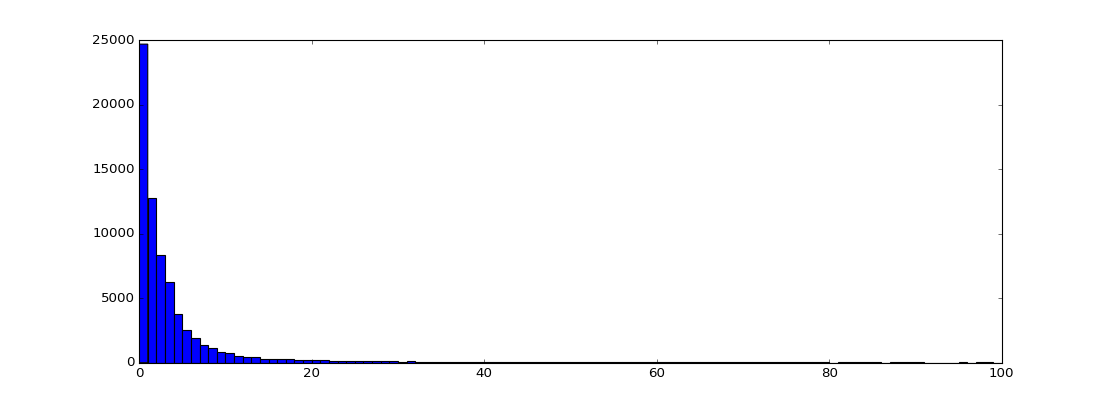

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.hist(x, bins=100, range=[0,100])
plt.show()

In [5]:
ext

array([[    0,   249,   297,  1881,  2385,  2889,     0],
       [    0,     0,  4065,  4197,  4239,  4281,     0],
       [    0,     0,     0,  4379,  5765,  7151, 10385],
       [    0,     0,     0,     0, 14741,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0]])

In [13]:
X.shape

(72274, 10760)

In [8]:
Y_pred

array([ 2.15119564,  2.29900194,  2.0995028 , ...,  1.031052  ,
        0.83814329,  0.80688659])

In [138]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=50, max_features=0.5, min_samples_leaf=24, n_jobs=-1)
rf.fit(X, Y, weight)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None, min_samples_leaf=24,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [139]:
Y1_pred = rf.predict(X1)
Y1_pred[Y1_pred<0]=0
print mape(Y1, Y1_pred, slot1, dist1)

0.474481374663


In [5]:
Y_pred = rf.predict(X)
Y_pred[Y_pred<0]=0
mape(Y, Y_pred, slot_train, dist_train)

2.0844655127184564

In [20]:
Y1_pred = (lr.predict(X1)+rf.predict(X1))/2
Y2_pred = (lr.predict(X2)+rf.predict(X2))/2
Y1_pred[Y1_pred<0]=0
Y2_pred[Y2_pred<0]=0
print (mape(Y1, Y1_pred, slot1, dist1)+mape(Y2, Y2_pred, slot2, dist2))/2

0.472960543559


| Method description | Training set | Validation set |
|---|---|---|
| Rigle, alpha=50, weighted. 144slot+24h+weekday+district+pre7dstatus+weather | 0.5123620179427425 | 0.517201372498 |
| Rigle, alpha=50, weighted. 144slot+24h+weekday+district+pre7dstatus+pre1slotstatus+weather | 0.46628984499361303 | 0.486138200681 |
| RF, tree=50, min_samples_leaf=16, weighted. 144slot+24h+weekday+district+pre7dstatus+pre1slotstatus+weather | 0.44512307730615425 | 0.483293242609 |
| RF, tree=50, min_samples_leaf=20, weighted. 144slot+24h+weekday+district+pre7dstatus+pre1slotstatus+1storderstatus | 0.45543519259309279 | 0.48353572376 |
| Rigle, alpha=40, weighted. 144slot+24h+weekday+district+pre7dstatus+pre1slotstatus | 0.46387521799056297 | 0.480073979685 |
| Rigle, alpha=30, weighted. 144slot+24h+weekday+district+pre7dstatus+pre1slotstatus+combinedpre2slotstatus | 0.44594466350408518 | 0.47709077919 |
| Rigle, alpha=30, weighted. 24h+weekday+district+pre7dstatus+pre1slotstatus+combinedpre2slotstatus | 0.45392775229804522 | 0.465871624974 |

In [34]:
from evaluation import *

X, Y, slot_train, dist_train = getdata('training_data_total', None)

In [2]:
X1, Y1, slot1, dist1 = getdata("validation_data")

In [3]:
import xgboost as xgb

dtrain = xgb.DMatrix(X, label=Y, weight=weight)
dvalid = xgb.DMatrix(X1)

In [53]:
gbdr = xgb.train({"max_depth":60,"objective":"reg:linear", "eval_metric":"mae", 
                  "min_child_weight":5, 'alpha':10, 'lambda':1,'gamma':1, 'subsample':0.9}, dtrain, num_boost_round=3)

In [54]:
Y1_pred = gbdr.predict(dvalid)
Y1_pred[Y1_pred<0]=0
print mape(Y1, Y1_pred, slot1, dist1)
print mapesp(Y1, Y1_pred, slot1, dist1)

0.389710510719
0.402617373827


In [55]:
Y_pred = gbdr.predict(dtrain)
Y_pred[Y_pred<0]=0
mape(Y, Y_pred, slot_train, dist_train)

0.36212591356868901

In [50]:
lr = xgb.train({"booster":"gblinear",'alpha':15, 'lambda':5}, dtrain, num_boost_round=10)

In [51]:
Y1_pred = lr.predict(dvalid)
Y1_pred[Y1_pred<0]=0
print mape(Y1, Y1_pred, slot1, dist1)

0.463605433711


In [52]:
Y_pred = lr.predict(dtrain)
Y_pred[Y_pred<0]=0
mape(Y, Y_pred, slot_train, dist_train)

0.45351344292540796

In [31]:
Y1_pred

array([ 1.90201676,  1.80177689,  1.50608754, ...,  1.22106409,
        1.10895848,  1.20932913], dtype=float32)

| Method description | Training set | Validation set |
|---|---|---|
| xgb.gbrt, depth=50, min_child_weight=16, alpha=5, num_boost_round=3, 24h+weekday+66dist+pre7daystatus+pre1slotstatus+combinedpre2slotsstatus, all cross | 0.38299178471263517 | 0.393472164499 |
| xgb.gbrt, depth=50, min_child_weight=1, gamma=12, alpha=5, num_boost_round=3, 24h+weekday+66dist+pre7daystatus+pre1slotstatus+combinedpre2slotsstatus+lrpred, partial cross| 0.37248708570001299 | 0.389232255639 |
| xgb.gbrt, depth=5, min_child_weight=5, gamma=10, alpha=5, subsample=0.8, num_boost_round=3,  24h+weekday+66dist+pre7daystatus+pre1slotstatus+combinedpre2slotsstatus+lrpred, partial cross| 0.36640954123432606 | 0.38390488155 |
| xgb.gbrt, depth=6, min_child_weight=3, gamma=0, alpha=5, lambda=1, subsample=0.85, num_boost_round=3,  24h+weekday+66dist+pre7daystatus+pre1slotstatus+combinedpre2slotsstatus+pre3avg+pre3std+lrpred, partial cross| 0.36800288199349773 | 0.381476277441 |

In [31]:
Y1_pred

array([ 1.82834542,  1.9660418 ,  2.42859507, ...,  1.13123298,
        1.01101041,  1.00637913], dtype=float32)

In [43]:
with open("lr_test_rst", "w") as fw:
    for y in Y_test:
        fw.write("{0}\n".format(y))

In [54]:
with open("lr_valid_rst", "w") as fw:
    for y in Y1_pred:
        fw.write("{0}\n".format(y))

In [42]:
Xt, recs = gettestdata("test_data", "season_1/test_set_2/read_me_2.txt", None)
dtest = xgb.DMatrix(Xt)

Y_test = lr.predict(dtest)

In [47]:
Y_test.shape

(2838,)

In [3]:
from evaluation import *

X, Y, slot_train, dist_train = getdata('training_data', None, extent2d=False)
X1, Y1, slot1, dist1 = getdata("validation_data", None, extent2d=False)

In [4]:
x = np.asarray(X.todense()[:, 184])